# Sentiment based on tweet frequency

Converted to script

Outputs overall sentiment (with rounded polarity) and sentiment over time (frequency bins).
Also has function for computing overall average sentiment.

There are 407,489 tweets that need to be split up

In [1]:
import os # creating directories
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load cleaned tweet corpus data
df = pd.read_csv("../datain/sentiment/cleaned_tweets_for_sentiment.csv")
df = df.drop("Unnamed: 0", axis=1)
df

,created_at,id,cleaned_tweet
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project! reset
2,2021-05-31 23:59:35+00:00,1399515936093204480,such a beautiful project and congratulations t...
3,2021-05-31 23:58:47+00:00,1399515734007447552,i am participating in the cryptoultraman nft a...
4,2021-05-31 23:58:44+00:00,1399515723274280960,"nice to find this project, this project will b..."
...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena
407486,2021-02-01 10:49:53+00:00,1356193045817872384,a great project
407487,2021-02-01 09:29:19+00:00,1356172769424244736,how are nft rates determined? higher nft chanc...


# Clean data

In [3]:
# remove all null created_at values from dataframe
df = df.drop(df[df['created_at'].isnull()].index)
df = df.drop(df[df['cleaned_tweet'].isnull()].index)
# ensure that all values in created_at has 2021 (and not random strings)
df = df[df['created_at'].str.contains("2021")]

In [4]:
# split created_at into date and time columns
# https://intellipaat.com/community/13909/python-how-can-i-split-a-column-with-both-date-and-time-e-g-2019-07-02-00-12-32-utc-into-two-separate-columns
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.date
df['time'] = df['created_at'].dt.time

In [5]:
df[df["cleaned_tweet"].isnull()]

,created_at,id,cleaned_tweet,date,time


In [6]:
df.dtypes

created_at       datetime64[ns, UTC]
id                             int64
cleaned_tweet                 object
date                          object
time                          object
dtype: object

# Sentiment: apply polarity score

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [8]:
analyzer = SentimentIntensityAnalyzer()

In [9]:
# add polarity scores to df
# https://github.com/sidneykung/twitter_hate_speech_detection/blob/master/preprocessing/VADER_sentiment.ipynb
pol = lambda x: analyzer.polarity_scores(x)
df['polarity'] = df["cleaned_tweet"].apply(pol)
df

,created_at,id,cleaned_tweet,date,time,polarity
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project,2021-05-31,23:59:42,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp..."
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project! reset,2021-05-31,23:59:40,"{'neg': 0.0, 'neu': 0.313, 'pos': 0.687, 'comp..."
2,2021-05-31 23:59:35+00:00,1399515936093204480,such a beautiful project and congratulations t...,2021-05-31,23:59:35,"{'neg': 0.0, 'neu': 0.463, 'pos': 0.537, 'comp..."
3,2021-05-31 23:58:47+00:00,1399515734007447552,i am participating in the cryptoultraman nft a...,2021-05-31,23:58:47,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2021-05-31 23:58:44+00:00,1399515723274280960,"nice to find this project, this project will b...",2021-05-31,23:58:44,"{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'comp..."
...,...,...,...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great,2021-02-01,11:31:45,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena,2021-02-01,11:05:55,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp..."
407486,2021-02-01 10:49:53+00:00,1356193045817872384,a great project,2021-02-01,10:49:53,"{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp..."
407487,2021-02-01 09:29:19+00:00,1356172769424244736,how are nft rates determined? higher nft chanc...,2021-02-01,09:29:19,"{'neg': 0.153, 'neu': 0.589, 'pos': 0.258, 'co..."


In [10]:
# split polarity scores into separate columns
df = pd.concat([df.drop(['polarity'], axis=1), df['polarity'].apply(pd.Series)], axis=1)
df

,created_at,id,cleaned_tweet,date,time,neg,neu,pos,compound
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project,2021-05-31,23:59:42,0.000,0.256,0.744,0.4404
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project! reset,2021-05-31,23:59:40,0.000,0.313,0.687,0.6588
2,2021-05-31 23:59:35+00:00,1399515936093204480,such a beautiful project and congratulations t...,2021-05-31,23:59:35,0.000,0.463,0.537,0.9677
3,2021-05-31 23:58:47+00:00,1399515734007447552,i am participating in the cryptoultraman nft a...,2021-05-31,23:58:47,0.000,1.000,0.000,0.0000
4,2021-05-31 23:58:44+00:00,1399515723274280960,"nice to find this project, this project will b...",2021-05-31,23:58:44,0.000,0.659,0.341,0.8860
...,...,...,...,...,...,...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great,2021-02-01,11:31:45,0.000,0.196,0.804,0.6249
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena,2021-02-01,11:05:55,0.000,0.476,0.524,0.2960
407486,2021-02-01 10:49:53+00:00,1356193045817872384,a great project,2021-02-01,10:49:53,0.000,0.328,0.672,0.6249
407487,2021-02-01 09:29:19+00:00,1356172769424244736,how are nft rates determined? higher nft chanc...,2021-02-01,09:29:19,0.153,0.589,0.258,0.3736


## Sentiment: round polarity

In [11]:
def calc_polarity(x, bound):
    if x < -bound:
        return -1
    elif x > bound:
        return 1
    else:
        return 0

round_pol = lambda x: calc_polarity(x, 0.05)

In [12]:
# round polarity up/down
df['rounded_polarity'] = df['compound'].apply(round_pol)
df

,created_at,id,cleaned_tweet,date,time,neg,neu,pos,compound,rounded_polarity
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project,2021-05-31,23:59:42,0.000,0.256,0.744,0.4404,1
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project! reset,2021-05-31,23:59:40,0.000,0.313,0.687,0.6588,1
2,2021-05-31 23:59:35+00:00,1399515936093204480,such a beautiful project and congratulations t...,2021-05-31,23:59:35,0.000,0.463,0.537,0.9677,1
3,2021-05-31 23:58:47+00:00,1399515734007447552,i am participating in the cryptoultraman nft a...,2021-05-31,23:58:47,0.000,1.000,0.000,0.0000,0
4,2021-05-31 23:58:44+00:00,1399515723274280960,"nice to find this project, this project will b...",2021-05-31,23:58:44,0.000,0.659,0.341,0.8860,1
...,...,...,...,...,...,...,...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great,2021-02-01,11:31:45,0.000,0.196,0.804,0.6249,1
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena,2021-02-01,11:05:55,0.000,0.476,0.524,0.2960,1
407486,2021-02-01 10:49:53+00:00,1356193045817872384,a great project,2021-02-01,10:49:53,0.000,0.328,0.672,0.6249,1
407487,2021-02-01 09:29:19+00:00,1356172769424244736,how are nft rates determined? higher nft chanc...,2021-02-01,09:29:19,0.153,0.589,0.258,0.3736,1


Text(0.5, 0, 'Tweets')

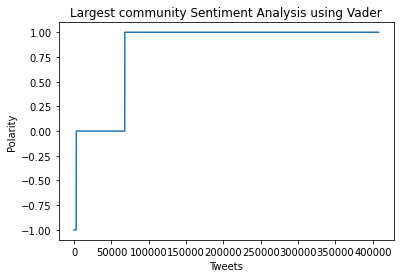

In [13]:
# plot rounded polarity
plt.plot(df.index, df['rounded_polarity'].sort_values())
plt.title('Largest community Sentiment Analysis using Vader')
plt.ylabel('Polarity')
plt.xlabel('Tweets')

In [14]:
# get amount of rounded negative, neutral, and positive polarity
num_rounded_sentiments = df.groupby('rounded_polarity').count()
num_rounded_sentiments

,created_at,id,cleaned_tweet,date,time,neg,neu,pos,compound
rounded_polarity,,,,,,,,,
-1,2889,2889,2889,2889,2889,2889,2889,2889,2889
0,64912,64912,64912,64912,64912,64912,64912,64912,64912
1,338764,338764,338764,338764,338764,338764,338764,338764,338764


In [15]:
# plot rounded negative, neutral, and positive sentiment amounts
plt.bar(num_rounded_sentiments.index, num_rounded_sentiments["compound"])
plt.title('Rounded Overall Sentiment')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.savefig('../dataout/sentiment/rounded_overall_sentiment.jpeg')
plt.close()

# Split data into segments

In [16]:
# sort dataframe by date
df = df.sort_values(by=['date', 'time'])
df

,created_at,id,cleaned_tweet,date,time,neg,neu,pos,compound,rounded_polarity
407488,2021-02-01 03:58:29+00:00,1356089513857208320,nft friends,2021-02-01,03:58:29,0.000,0.244,0.756,0.4767,1
407487,2021-02-01 09:29:19+00:00,1356172769424244736,how are nft rates determined? higher nft chanc...,2021-02-01,09:29:19,0.153,0.589,0.258,0.3736,1
407486,2021-02-01 10:49:53+00:00,1356193045817872384,a great project,2021-02-01,10:49:53,0.000,0.328,0.672,0.6249,1
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena,2021-02-01,11:05:55,0.000,0.476,0.524,0.2960,1
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great,2021-02-01,11:31:45,0.000,0.196,0.804,0.6249,1
...,...,...,...,...,...,...,...,...,...,...
4,2021-05-31 23:58:44+00:00,1399515723274280960,"nice to find this project, this project will b...",2021-05-31,23:58:44,0.000,0.659,0.341,0.8860,1
3,2021-05-31 23:58:47+00:00,1399515734007447552,i am participating in the cryptoultraman nft a...,2021-05-31,23:58:47,0.000,1.000,0.000,0.0000,0
2,2021-05-31 23:59:35+00:00,1399515936093204480,such a beautiful project and congratulations t...,2021-05-31,23:59:35,0.000,0.463,0.537,0.9677,1
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project! reset,2021-05-31,23:59:40,0.000,0.313,0.687,0.6588,1


In [17]:
NUM_SEGMENTS = 40

In [18]:
# split df into n groups of equal length (returns list of sub dataframes)
# https://stackoverflow.com/questions/2130016/splitting-a-list-into-n-parts-of-approximately-equal-length
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

In [19]:
# list of dfs
sub_dfs = list(split(df, NUM_SEGMENTS))
sub_dfs

[                      created_at                   id  \
 407488 2021-02-01 03:58:29+00:00  1356089513857208320   
 407487 2021-02-01 09:29:19+00:00  1356172769424244736   
 407486 2021-02-01 10:49:53+00:00  1356193045817872384   
 407485 2021-02-01 11:05:55+00:00  1356197080272752640   
 407484 2021-02-01 11:31:45+00:00  1356203583193063424   
 ...                          ...                  ...   
 397307 2021-03-17 20:26:44+00:00  1372283279462723584   
 397306 2021-03-17 20:30:33+00:00  1372284242160418816   
 397305 2021-03-17 20:32:15+00:00  1372284669312393216   
 397304 2021-03-17 20:33:15+00:00  1372284921444720640   
 397303 2021-03-17 20:37:09+00:00  1372285902798651392   
 
                                             cleaned_tweet        date  \
 407488                                        nft friends  2021-02-01   
 407487  how are nft rates determined? higher nft chanc...  2021-02-01   
 407486                                    a great project  2021-02-01   
 40748

In [20]:
sub_dfs[0]

,created_at,id,cleaned_tweet,date,time,neg,neu,pos,compound,rounded_polarity
407488,2021-02-01 03:58:29+00:00,1356089513857208320,nft friends,2021-02-01,03:58:29,0.000,0.244,0.756,0.4767,1
407487,2021-02-01 09:29:19+00:00,1356172769424244736,how are nft rates determined? higher nft chanc...,2021-02-01,09:29:19,0.153,0.589,0.258,0.3736,1
407486,2021-02-01 10:49:53+00:00,1356193045817872384,a great project,2021-02-01,10:49:53,0.000,0.328,0.672,0.6249,1
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena,2021-02-01,11:05:55,0.000,0.476,0.524,0.2960,1
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great,2021-02-01,11:31:45,0.000,0.196,0.804,0.6249,1
...,...,...,...,...,...,...,...,...,...,...
397307,2021-03-17 20:26:44+00:00,1372283279462723584,please i need this nft,2021-03-17,20:26:44,0.000,0.635,0.365,0.3182,1
397306,2021-03-17 20:30:33+00:00,1372284242160418816,nft trending vibes,2021-03-17,20:30:33,0.000,1.000,0.000,0.0000,0
397305,2021-03-17 20:32:15+00:00,1372284669312393216,"look this in , will make u rich..",2021-03-17,20:32:15,0.000,0.660,0.340,0.5574,1
397304,2021-03-17 20:33:15+00:00,1372284921444720640,click my sponsor link to claim your free plati...,2021-03-17,20:33:15,0.000,0.736,0.264,0.5562,1


# Sentiment analysis per segment

In [21]:
def get_avg_segment_sentiment(df):
    sumsentiment = 0
    count = 0
    for i in range(len(df.index)):
        sumsentiment += df['compound'].iloc[i]
        count += 1
    return sumsentiment / count

In [22]:
compounds = []
mns, mxs = [], []
dates = []
for sub_df in sub_dfs:
    compounds.append(sub_df.compound.mean())
    mxs.append(sub_df.index.max())
    mns.append(sub_df.index.min())
    dates.append(sub_df.date.iloc[0])

compound_df = pd.DataFrame(dict(
    mn=mns,
    mx=mxs,
    compouned=compounds,
    date=dates,
))

In [23]:
compound_df

,mn,mx,compouned,date
0,397303,407488,0.620325,2021-02-01
1,387137,397302,0.817376,2021-03-17
2,376966,387136,0.822240,2021-03-20
3,366767,376965,0.726567,2021-03-21
4,356492,366766,0.658903,2021-03-27
5,346311,356491,0.585611,2021-04-04
6,336024,346310,0.608715,2021-04-08
7,325840,336023,0.540375,2021-04-15
8,315662,325839,0.438953,2021-04-20
9,305481,315661,0.429945,2021-04-24


In [24]:
DATA_OUT = '../dataout/sentiment/sentiment_per_segment.jpeg'

In [25]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot(compound_df.date, 'compouned', data=compound_df)

# Major ticks every month.
fmt_month = mdates.MonthLocator()

ax.xaxis.set_major_locator(fmt_month)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

#plot
plt.title('Sentiment per segment overall (40 segments of ~10k)')
plt.xlabel('Date')
plt.ylabel('Vader Sentiment score')
# save plot to output
plt.savefig(DATA_OUT)
plt.close()

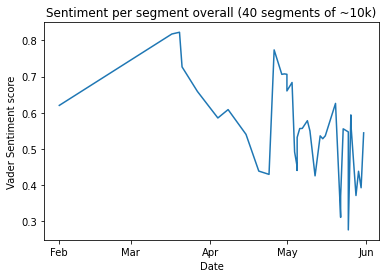

In [26]:
fig

In [27]:
import matplotlib.dates as mdates

def run_sentiment_segments(NUM_SEGMENTS):
    # create segments
    sub_dfs = list(split(df, NUM_SEGMENTS))
    num_tweets_per_segment = round(len(sub_dfs[0]) / 1000, 1)
    
    # get compound vals
    compounds = []
    mns, mxs = [], []
    dates = []
    for sub_df in sub_dfs:
        compounds.append(sub_df.compound.mean())
        mxs.append(sub_df.index.max())
        mns.append(sub_df.index.min())
        dates.append(sub_df.date.iloc[0])

    compound_df = pd.DataFrame(dict(
        mn=mns,
        mx=mxs,
        compouned=compounds,
        date=dates,
    ))
    
    # get average sentiment
    avg_sentiment = df['compound'].mean()
    
    # plot
    fig, ax = plt.subplots()
    ax.plot(compound_df.date, 'compouned', data=compound_df)

    # Major ticks every month.
    fmt_month = mdates.MonthLocator()

    ax.xaxis.set_major_locator(fmt_month)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

    # plot
    plt.title('Sentiment per segment for overall data ({} segments of ~{}k)'.format(NUM_SEGMENTS, num_tweets_per_segment))
    plt.xlabel('Date')
    plt.ylabel('Vader Sentiment score')

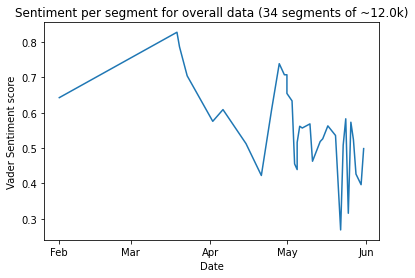

In [28]:
NUM_SEGMENTS = 34
run_sentiment_segments(NUM_SEGMENTS)

# Get overall average sentiment

In [29]:
avg_sentiment = df['compound'].mean()
avg_sentiment

0.5566739261864648

# Get overall median

In [55]:
median_sentiment = compound_df['compouned'].median()
median_sentiment

0.552764738292011

# Get standard deviation

In [54]:
# standard deviation
compound_df['compouned'].std()

0.1301645413910109

## Plot boxplot

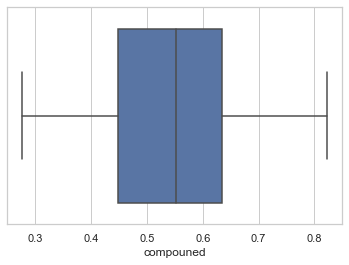

In [68]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = compound_df['compouned']
ax = sns.boxplot(x=tips)

# Get volatility score
Not converted to script yet

[Volatility score tutorial (written - incomplete)](https://www.learnpythonwithrune.org/calculate-the-volatility-of-historic-stock-prices-with-pandas-and-python/)

[Volatility score video tutorial - complete](https://www.learnpythonwithrune.org/start-python-with-pandas-for-financial-analysis/#lesson-6)


## Notes
* Volatility is the standard deviation of the log return


Shift gets the previous row's value
```
np.log(compound_df['compouned']/compound_df['compouned'].shift())```



In [31]:
import numpy as np

compound_df['Log returns'] = np.log(compound_df['compouned']/compound_df['compouned'].shift())
compound_df

,mn,mx,compouned,date,Log returns
0,397303,407488,0.620325,2021-02-01,NaN
1,387137,397302,0.817376,2021-03-17,0.275855
2,376966,387136,0.822240,2021-03-20,0.005932
3,366767,376965,0.726567,2021-03-21,-0.123701
4,356492,366766,0.658903,2021-03-27,-0.097754
5,346311,356491,0.585611,2021-04-04,-0.117921
6,336024,346310,0.608715,2021-04-08,0.038695
7,325840,336023,0.540375,2021-04-15,-0.119087
8,315662,325839,0.438953,2021-04-20,-0.207871
9,305481,315661,0.429945,2021-04-24,-0.020735


In [32]:
# get standard deviation (per segment)
compound_df['Log returns'].std()

0.27610951623296526

In [33]:
# total number of days between 1 Feb and 31 May 2021
# total_num_days = 28+31+30+31

In [34]:
# get volatility which is the standard deviation * sqrt(NUM_SEGMENTS)
volatility = compound_df['Log returns'].std()*NUM_SEGMENTS**.5
volatility

1.609981306863428

In [35]:
str_vol = str(round(volatility, 4)*100)

Text(0.5, 1.0, 'Sentiment segment volatility: 161.0%')

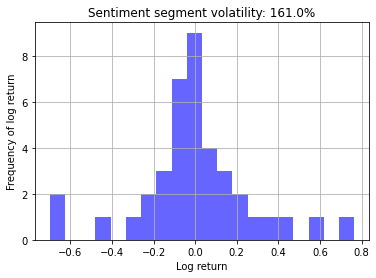

In [36]:
fig, ax = plt.subplots()
compound_df['Log returns'].hist(ax=ax, bins=20, alpha=0.6, color='b')
ax.set_xlabel("Log return")
ax.set_ylabel("Frequency of log return")
ax.set_title(f"Sentiment segment volatility: {str_vol}%")

In [37]:
# moving average (average for the last m days)
m = 10
compound_df['Moving average 10'] = compound_df['compouned'].rolling(m).mean()

In [38]:
compound_df

,mn,mx,compouned,date,Log returns,Moving average 10
0,397303,407488,0.620325,2021-02-01,NaN,NaN
1,387137,397302,0.817376,2021-03-17,0.275855,NaN
2,376966,387136,0.822240,2021-03-20,0.005932,NaN
3,366767,376965,0.726567,2021-03-21,-0.123701,NaN
4,356492,366766,0.658903,2021-03-27,-0.097754,NaN
5,346311,356491,0.585611,2021-04-04,-0.117921,NaN
6,336024,346310,0.608715,2021-04-08,0.038695,NaN
7,325840,336023,0.540375,2021-04-15,-0.119087,NaN
8,315662,325839,0.438953,2021-04-20,-0.207871,NaN
9,305481,315661,0.429945,2021-04-24,-0.020735,0.624901
